# Task 2: Supervised Learning

**Aim: To predict the percentage of marks based on the number of hours studied**

**Objective: Simple Regression for two variables**


In [2]:
# import libraries

import pandas as pd                  # to create python objects as rows and columns 
import numpy as np                   # to create multidimensional array object 
import matplotlib.pyplot as plt      # for plotting

# plot graphics to appear in jupyter notebook 
%matplotlib inline                  

In [3]:
# Read the data 

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)      # read the data from the remote file (url) using pandas
student_data                         # displays the student data from the url 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Simple Linear Regression/ Bivariate Linear Regression
To predict the value of dependent variable based on the value of an independent variable.

Objective of the task: To predict the percentage of marks (dependent variable) based on the number of hours studied (independent variable).

Assumptions:
1. The dependent variable must be continuous
2. Linear relationship between the dependent and independent variable
3. Outliers should not be present
4. Residual error of the regression line is approximately normally distributed


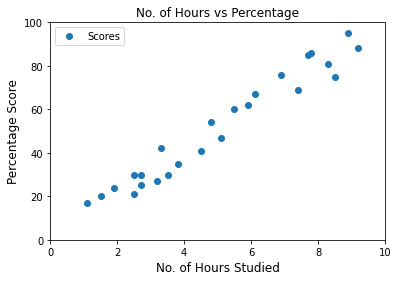

In [4]:
# to find the linear relationship through visual inspection

student_data.plot(x='Hours', y='Scores', style='o')   # scatter plot
plt.title('No. of Hours vs Percentage', fontsize=12)  
plt.xlabel('No. of Hours Studied', fontsize=12)  
plt.ylabel('Percentage Score',fontsize=12) 
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.show()

In [5]:
student_data.describe()            # statistical description of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


To find outliers using z-score

Z-score indicates how the value is far away from mean in standard deviatioin units

z-score greater than 3 and less than -3 is considered as outliers

In [6]:
from scipy import stats                     # statistical functions
z_score_data=stats.zscore(student_data)
print (z_score_data) 

[[-1.01532822 -1.23022337]
 [ 0.03556882 -0.18082023]
 [-0.7323944  -0.98805342]
 [ 1.40981881  0.94930623]
 [-0.61113705 -0.86696844]
 [-1.4195194  -1.27058503]
 [ 1.69275263  1.4740078 ]
 [ 0.19724529  0.34388134]
 [ 1.32898057  1.19147618]
 [-0.93448999 -1.06877674]
 [ 1.08646587  1.35292282]
 [ 0.35892176  0.42460466]
 [-0.20694588 -0.42299019]
 [-0.69197529 -0.38262853]
 [-1.58119586 -1.39167001]
 [ 1.57149528  1.75653941]
 [-1.01532822 -0.86696844]
 [-1.25784293 -1.1091384 ]
 [ 0.43975999  0.62641295]
 [ 0.96520852  0.70713627]
 [-0.93448999 -0.86696844]
 [-0.08568853  0.10171138]
 [-0.4898797  -0.66516014]
 [ 0.76311293  0.98966788]
 [ 1.12688499  1.39328448]]


In [7]:
arr = z_score_data
outliers= (arr <-3.) | (arr > 3.)               # Boolean series
result = np.where((arr <-3.) | (arr > 3.))          # using bitwise operator    
print(result)
print(outliers)

(array([], dtype=int64), array([], dtype=int64))
[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


In [8]:
# To split the data for training 

X = student_data.iloc[:,: -1].values  # row vector till the last column
Y = student_data.iloc[:, -1].values   # the last column
print(student_data.shape)             # dimension of the student data
print(X.shape)
print(Y.shape)

(25, 2)
(25, 1)
(25,)


In [9]:
# splits the X and Y into random train and test subsets

from sklearn.model_selection import train_test_split  
 # 25% of the dataset will be allocated to test set and 75% to training set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=1/4, random_state=0) 


In [10]:
# Training the algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()             # Linear Regression using least square method
regressor.fit(X_train, Y_train)            # Fit the linear model

LinearRegression()

In [11]:
# regression line equation y=m*x+c

print("m=",regressor.coef_)
print("c=",regressor.intercept_)
print("Regression: y= {:.2f}*x + {:.2f}".format(float(regressor.coef_),float(regressor.intercept_)))

m= [9.94167834]
c= 1.932204253151646
Regression: y= 9.94*x + 1.93


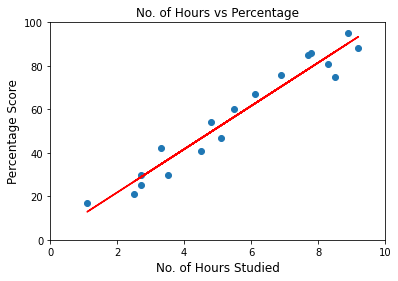

In [12]:

plt.scatter(X_train, Y_train)                # Plotting for the training data
plt.plot(X_train, regressor.coef_*X_train+regressor.intercept_, 'r' )  # Plotting the regression line
plt.title('No. of Hours vs Percentage', fontsize=12)  
plt.xlabel('No. of Hours Studied', fontsize=12)  
plt.ylabel('Percentage Score',fontsize=12) 
# plt.legend(loc='upper left')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.show()

In [36]:
Y_pred_test = regressor.predict(X_test)      # To predict the scores using the test data of hours
Y_pred_train=regressor.predict(X_train)

In [37]:
# create the table for predicted and test scores
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_test})  
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [38]:
residual_error = Y_test - Y_pred_test    # residual error of the regression line     
print(residual_error)

[ 3.15527824 -6.74557494 -6.50062397  3.2135999   1.41189354 -4.71058194
  3.1786069 ]


In [39]:
mean_residual=np.mean(residual_error)   # mean of the residual error
print(mean_residual)

-0.9996288952356619


In [40]:
sd_residual=np.std(residual_error)     # standard deviation of the residual error
print(sd_residual)

4.39700645289382


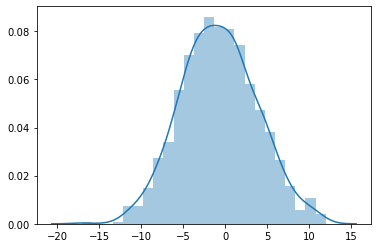

In [41]:
# histogram and normal distribution of the residual error

import seaborn as sns
from scipy.stats import norm

re = norm.rvs(mean_residual,sd_residual,size=1000) # samples consists of 1000 random numbers

sns.distplot(re)

In [49]:
hours = [9.25]                         # check with random hours
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.89272889341655


In [50]:
 from sklearn import metrics    # To obtain the accuracy of the linear model
    
print("RMSE_test =",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))  # Root mean squared error
print("RMSE_train =",np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

RMSE_test = 4.5092043283688055
RMSE_train = 5.7052937757405875


The error of testing data is lesser than error of training data, therefore the predicted model approximately fits the data

In [51]:
rmspe = (np.sqrt(np.mean(np.square((Y_test - Y_pred_test) / Y_test)))) * 100 

print(rmspe) # Root mean squared percentage error

14.334350272052793


In [52]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(Y_test ,Y_pred) )

R2-score: 0.94


The value of R2-score suggests a linear relationship between Y and X

Conclusion

1. For two or more independent variables, multivariate linear regression can be used.
2. z-score is employed to detect any outliers
3. The "best" fit line is determined from the least square regression technique.
